In [2]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'
pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# Get all the good fileIDs from the folder

In [3]:
pathToFolderWithFilenames = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun_speed/yidi_new_data_for_joh/08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/budding yeast abp1gfp/"

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(pathToFolderWithFilenames) if isfile(join(pathToFolderWithFilenames, f))]
print(onlyfiles)




['[Trajectory number 1558].tif', '[Trajectory number 772].tif', '[Trajectory number 590].tif', '[Trajectory number 2400].tif', '.DS_Store', '[Trajectory number 2206].tif', '[Trajectory number 548].tif', '[Trajectory number 1518].tif', '[Trajectory number 1522].tif', '[Trajectory number 533].tif', '[Trajectory number 1084].tif', '[Trajectory number 447].tif', '[Trajectory number 164].tif', '[Trajectory number 2277].tif', '[Trajectory number 718].tif', '[Trajectory number 780].tif', '[Trajectory number 893].tif', '[Trajectory number 1894].tif', '[Trajectory number 1507].tif', '[Trajectory number 994].tif', '[Trajectory number 1767].tif', '[Trajectory number 223].tif', '[Trajectory number 1232].tif', '[Trajectory number 1766].tif', '[Trajectory number 444].tif', '[Trajectory number 405].tif', '[Trajectory number 662].tif', '[Trajectory number 623].tif', '[Trajectory number 988].tif', '[Trajectory number 2317].tif', '[Trajectory number 212].tif', '[Trajectory number 1469].tif', '[Trajector

In [4]:
goodTrajectoryIDs = []
for filename in onlyfiles:
    if (filename != '.DS_Store'):
        number = int((filename.replace('[Trajectory number ','')).replace('].tif',''))
        print(filename,",",number)
        goodTrajectoryIDs.append(number)
print(goodTrajectoryIDs)   

[Trajectory number 1558].tif , 1558
[Trajectory number 772].tif , 772
[Trajectory number 590].tif , 590
[Trajectory number 2400].tif , 2400
[Trajectory number 2206].tif , 2206
[Trajectory number 548].tif , 548
[Trajectory number 1518].tif , 1518
[Trajectory number 1522].tif , 1522
[Trajectory number 533].tif , 533
[Trajectory number 1084].tif , 1084
[Trajectory number 447].tif , 447
[Trajectory number 164].tif , 164
[Trajectory number 2277].tif , 2277
[Trajectory number 718].tif , 718
[Trajectory number 780].tif , 780
[Trajectory number 893].tif , 893
[Trajectory number 1894].tif , 1894
[Trajectory number 1507].tif , 1507
[Trajectory number 994].tif , 994
[Trajectory number 1767].tif , 1767
[Trajectory number 223].tif , 223
[Trajectory number 1232].tif , 1232
[Trajectory number 1766].tif , 1766
[Trajectory number 444].tif , 444
[Trajectory number 405].tif , 405
[Trajectory number 662].tif , 662
[Trajectory number 623].tif , 623
[Trajectory number 988].tif , 988
[Trajectory number 2317]

# read data

In [5]:
#path = "/Users/Yidi/Desktop/YeastTrackAnalysis-master/"
path = "/Users/johannesschoeneberg/Desktop/SchoenebergLab/imageAnalysis_Yidi_Sun_speed/yidi_new_data_for_joh/08132018 for Joh/abp1gfp and fim1gfp 110msec 07232018/"
#folder = 'dataToAnalyze/'
folder = ''

################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

trajectoryIdToLookAt = goodTrajectoryIDs[0]
trajectoryIdToLookAt = 1232

print("we will look at trajectory {}".format(trajectoryIdToLookAt))

# change your filename to the file you want to analyze
file = 'all tracks.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

# if your file is a CSV: put FALSE
# if your file is a EXCEL: put TRUE
isExcel = False

excludeTheFirstNFrames = 5
################


outputpath = path+folder

we will look at trajectory 1232


In [6]:
if (isExcel):
    data = pd.read_excel(path+folder+file)
else:
    alldata = pd.read_csv(path+folder+file)
data = alldata[alldata['Trajectory']==trajectoryIdToLookAt]

data = data.reset_index(drop=True)
data = data[excludeTheFirstNFrames:]
data[0:5]

,,Trajectory,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore
5,51842,1232,222,256.16922,373.63696,0,3.53052,2.08162,5.35034,15.52628,49.29738,0.00583
6,51843,1232,223,256.92792,373.90320,0,4.18569,2.06469,5.23829,14.91196,46.13886,0.00549
7,51844,1232,224,256.13928,374.18262,0,4.47716,2.27675,6.30540,19.50944,65.29711,0.00578
8,51845,1232,225,256.51727,374.02307,0,5.62462,2.17126,5.77720,17.24055,55.88643,0.00543
9,51846,1232,226,256.45551,373.98120,0,6.78519,2.29346,6.45019,20.37836,69.92854,0.00546


# Trajectory in x,y

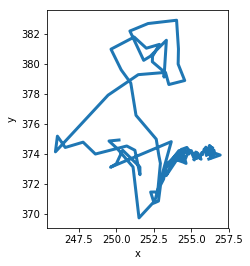

In [7]:

x = data['x'].values
y = data['y'].values
plt.plot(x,y,lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(outputpath+file+'_traj_xy.png')

# distance from start

In [8]:
time = frameToSecondConversion*data['Frame']
distancesFromStart = []
for i in range(1,len(data)):
    v0 = np.array([x[0],y[0]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    distancesFromStart.append(dist)
distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)



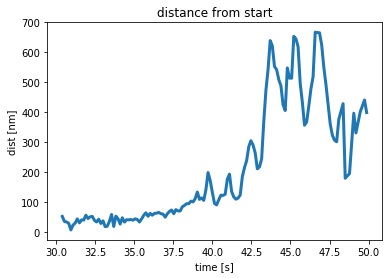

In [9]:
plt.plot(time[0:-1],distancesFromStart,lw=3)
plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_distToStart.png')

# intensity

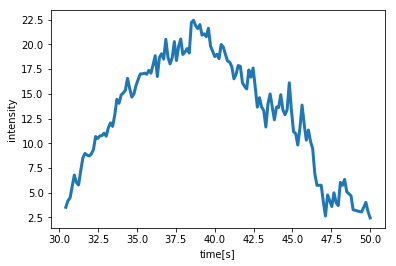

In [10]:

intensity = data['m0']
plt.plot(time,intensity,lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')
plt.savefig(file+'_intensity.png')

# speed

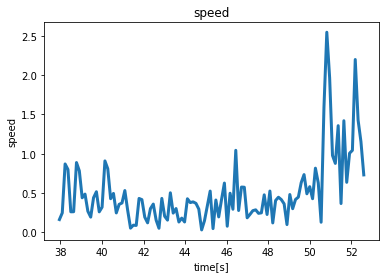

In [47]:

frameByFrameDistances = []
for i in range(1,len(data)):
    v0 = np.array([x[i-1],y[i-1]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    frameByFrameDistances.append(dist)
frameByFrameDistances = np.array(frameByFrameDistances)


plt.plot(time[0:-1],frameByFrameDistances,lw=3)
plt.title('speed')
plt.xlabel('time[s]')
plt.ylabel('speed')
plt.savefig(outputpath+file+'_speed.png')

# find inflection point

109
            Trajectory  Frame          x         y  z        m0       m1  \
5    61389        1558    277  609.41571  18.08413  0   3.15012  2.22965   
6    61390        1558    278  609.45734  17.92807  0   3.20719  2.06226   
7    61391        1558    279  609.69641  17.98717  0   3.35929  2.31276   
8    61392        1558    280  609.96985  17.16224  0   3.50390  2.33276   
9    61393        1558    281  609.61487  17.87797  0   3.62433  2.08943   
10   61394        1558    282  609.86285  17.79932  0   4.39343  2.09372   
11   61395        1558    283  609.77545  18.04553  0   5.07298  2.20866   
12   61396        1558    284  609.66022  17.16596  0   4.63724  2.09785   
13   61397        1558    285  609.55029  17.93959  0   4.76013  2.25507   
14   61398        1558    286  609.26868  17.60291  0   4.42681  2.28459   
15   61399        1558    287  609.59692  17.96092  0   5.13147  2.14038   
16   61400        1558    288  609.68408  17.70814  0   4.23161  2.33906   
17   614

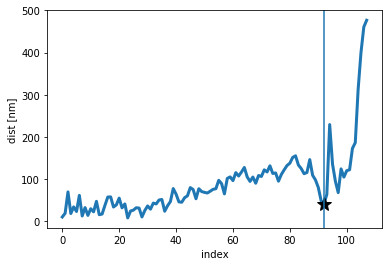

In [48]:


x=np.arange(0,len(distancesFromStart))
y=distancesFromStart


print(len(data))
print(data)
inflectionPointIndex = ytf.findInflectionPoint(x,y)
print("inflectionPointIndex: {}".format(inflectionPointIndex))
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))


#plt.plot(x, newy, 'o', label='original data',color='b')
plt.plot(distancesFromStart,lw=3)
plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
plt.axvline(x[inflectionPointIndex])

plt.xlabel('index')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_inflectionPoint.png')

# plot distance and intensity at the same time

inflectionPoint Frame: 364
inflectionPoint Time[s]: 49.868
inflectionPoint Intensity: 14.73471


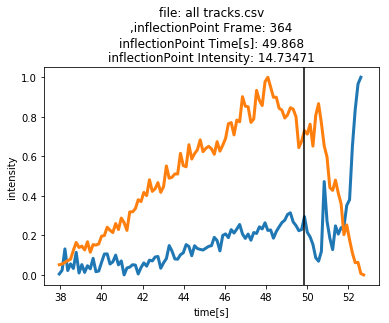

In [49]:
plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.axvline(time[0:-1][inflectionPointIndex],c='k')
inflectionPointFrame = data['Frame'][inflectionPointIndex]
inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
inflexctionPointIntensity = data['m0'][inflectionPointIndex]

print("inflectionPoint Frame: {}".format(inflectionPointFrame))
print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
print("inflectionPoint Intensity: {}".format(inflexctionPointIntensity))

plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))

plt.savefig(outputpath+file+'_intensity+distance.png')

inflectionPoint Frame: 364
inflectionPoint Time[s]: 49.868
inflectionPoint Intensity: 14.73471


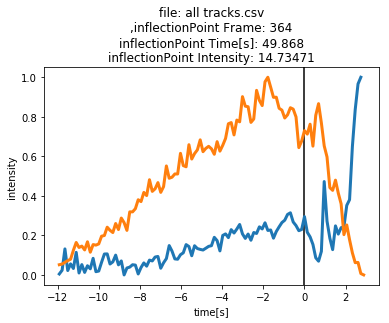

In [50]:


inflectionPointFrame = data['Frame'][inflectionPointIndex]
inflectionPointTime = frameToSecondConversion*(data['Frame'][inflectionPointIndex])
inflexctionPointIntensity = data['m0'][inflectionPointIndex]

print("inflectionPoint Frame: {}".format(inflectionPointFrame))
print("inflectionPoint Time[s]: {}".format(inflectionPointTime))
print("inflectionPoint Intensity: {}".format(inflexctionPointIntensity))

plt.axvline(time[0:-1][inflectionPointIndex]-inflectionPointTime,c='k')
plt.plot(time[0:-1]-inflectionPointTime,(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time-inflectionPointTime,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.title("file: {}\n,inflectionPoint Frame: {}\ninflectionPoint Time[s]: {}\ninflectionPoint Intensity: {}".format(file,inflectionPointFrame,inflectionPointTime,inflexctionPointIntensity))

plt.savefig(outputpath+file+'_intensity+distance.png')




In [51]:
# export as new excel files

data['time[s]']=time
data['time aligned [s]']=time-inflectionPointTime
distanceForExport = np.concatenate((np.array([0]),distancesFromStart))
data['distance']=distanceForExport
normDistanceForExport = np.concatenate((np.array([0]),(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart))))
data['distance normalized']= normDistanceForExport
data.to_csv(outputpath+file+'_processed.csv')
data

,,Trajectory,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore,time[s],time aligned [s],distance,distance normalized
5,61389,1558,277,609.41571,18.08413,0,3.15012,2.22965,6.10995,18.93724,64.31512,0.00514,37.949,-11.919,0.000000,0.000000
6,61390,1558,278,609.45734,17.92807,0,3.20719,2.06226,5.25476,15.12026,47.62191,0.00660,38.086,-11.782,10.498613,0.004741
7,61391,1558,279,609.69641,17.98717,0,3.35929,2.31276,6.56665,20.99225,73.04520,0.00521,38.223,-11.645,19.303329,0.023541
8,61392,1558,280,609.96985,17.16224,0,3.50390,2.33276,6.62094,21.09390,73.06997,0.00895,38.360,-11.508,69.915117,0.131612
9,61393,1558,281,609.61487,17.87797,0,3.62433,2.08943,5.32067,15.15220,46.82465,0.00612,38.497,-11.371,18.632072,0.022108
10,61394,1558,282,609.86285,17.79932,0,4.39343,2.09372,5.35303,15.36745,48.12895,0.00530,38.634,-11.234,34.459253,0.055904
11,61395,1558,283,609.77545,18.04553,0,5.07298,2.20866,5.99289,18.29399,60.79486,0.00551,38.771,-11.097,23.517322,0.032539
12,61396,1558,284,609.66022,17.16596,0,4.63724,2.09785,5.34553,15.14652,46.28144,0.00730,38.908,-10.960,61.760990,0.114201
13,61397,1558,285,609.55029,17.93959,0,4.76013,2.25507,6.23291,19.40057,65.85041,0.00497,39.045,-10.823,12.837062,0.009734
14,61398,1558,286,609.26868,17.60291,0,4.42681,2.28459,6.34334,19.69371,66.26019,0.00882,39.182,-10.686,32.706726,0.052162


# statistics

In [52]:
print("max intensity: {}".format(np.max(data['m0'])))
print("first frame: {}".format(data['Frame'].values[0]))
print("last frame: {}".format(np.array(data['Frame'])[-1]))

lenthOfTrackInFrames = np.array(data['Frame'])[-1]-np.array(data['Frame'].values[0])
print("lenght of track [frames]: {}".format(lenthOfTrackInFrames))

print("lenght of track [s]: {}".format(frameToSecondConversion*lenthOfTrackInFrames))

max intensity: 19.34884
first frame: 277
last frame: 385
lenght of track [frames]: 108
lenght of track [s]: 14.796000000000001
